# pilgram example

## setup

In [9]:
!wget "https://github.com/akiomik/pilgram/blob/master/notebooks/mtjimba.jpg?raw=true" -O mtjimba.jpg


--2023-08-01 14:16:11--  https://github.com/akiomik/pilgram/blob/master/notebooks/mtjimba.jpg?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... ^C


## original image

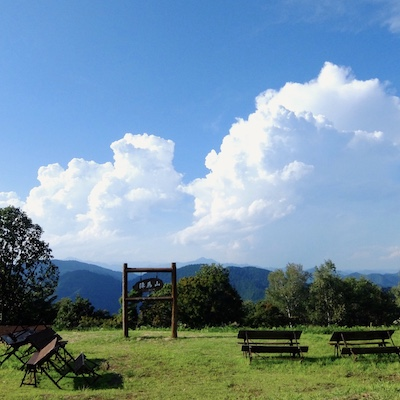

In [1]:
from IPython import display

# display.display_png(display.Image('figure.png'))

display.display_jpeg(display.Image('mtjimba.jpg'))

## image with filter

In [17]:
from pilgram import _1977, aden, brannan, brooklyn, clarendon, earlybird, gingham, hudson, inkwell, kelvin, lark, lofi, maven, mayfair, moon, nashville, perpetua, reyes, rise, slumber, stinson, toaster, valencia, walden, willow, xpro2
from PIL import Image

# 你的输入图像文件路径
input_image_path = "img/mtjimba.jpg"

# 定义滤镜函数列表
filters = [_1977, aden, brannan, brooklyn, clarendon, earlybird, gingham, hudson, inkwell, kelvin, lark, lofi, maven, mayfair, moon, nashville, perpetua, reyes, rise, slumber, stinson, toaster, valencia, walden, willow, xpro2]

# 循环应用滤镜并保存图像
for filter_func in filters:
    im = Image.open(input_image_path)
    filtered_im = filter_func(im)
    filter_name = filter_func.__name__
    output_path = f"img/{filter_name}.jpg"
    filtered_im.save(output_path)
    print(f"Applied {filter_name} and saved as {output_path}")


Applied _1977 and saved as _1977.jpg
Applied aden and saved as aden.jpg
Applied brannan and saved as brannan.jpg
Applied brooklyn and saved as brooklyn.jpg
Applied clarendon and saved as clarendon.jpg
Applied earlybird and saved as earlybird.jpg
Applied gingham and saved as gingham.jpg
Applied hudson and saved as hudson.jpg
Applied inkwell and saved as inkwell.jpg
Applied kelvin and saved as kelvin.jpg
Applied lark and saved as lark.jpg
Applied lofi and saved as lofi.jpg
Applied maven and saved as maven.jpg
Applied mayfair and saved as mayfair.jpg
Applied moon and saved as moon.jpg
Applied nashville and saved as nashville.jpg
Applied perpetua and saved as perpetua.jpg
Applied reyes and saved as reyes.jpg
Applied rise and saved as rise.jpg
Applied slumber and saved as slumber.jpg
Applied stinson and saved as stinson.jpg
Applied toaster and saved as toaster.jpg
Applied valencia and saved as valencia.jpg
Applied walden and saved as walden.jpg
Applied willow and saved as willow.jpg
Applied

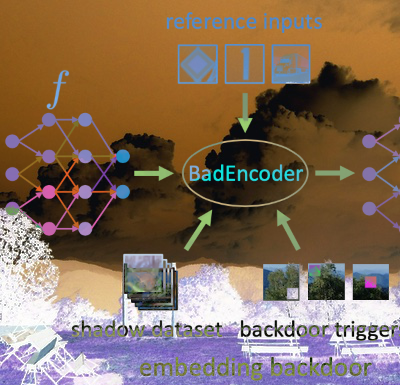

In [15]:
from PIL import Image
import pilgram.css.blending

backdrop = Image.open('mtjimba.jpg')
source = Image.open('figure.png')
pilgram.css.blending.exclusion(backdrop, source)

In [1]:
import torch
torch.cuda.set_device(3)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from pytorch_ssim import SSIM

# from piq import ssim, SSIMLoss
from tqdm import tqdm



class CIFAR10M(Dataset):
    def __init__(self, numpy_file, class_type, transform1=None,transform2=None):
        """
        Args:
            numpy_file (string): Path to the numpy file.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.input_array = np.load(numpy_file)
        self.data = self.input_array['x']
        self.targets = self.input_array['y'][:,0].tolist()
        self.classes = class_type
        self.transform1 = transform1
        self.transform2 = transform2

    def __len__(self):
        return self.data.shape[0]

    """CIFAR10 Dataset.
    """
    def __getitem__(self, index):
        img, target = self.data[index], self.targets[index]
        img = Image.fromarray(img)

        return self.transform1(img), self.transform2(img)

train_transform = transforms.Compose([
    # transforms.Resize(32),
    # transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=1.0),
    # transforms.RandomGrayscale(p=1.0),
    transforms.ToTensor(),
    # transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
])

test_transform_cifar10 = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
])

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# data = CIFAR10M(numpy_file='data/cifar10/train.npz', class_type=classes, transform1=train_transform,transform2=test_transform_cifar10)
# 第一个transfrom是用来生成misa训练样本的，第二个transform是用来生成给filter训练的样本的
# memory_loader = DataLoader(data, batch_size=4096, shuffle=False, pin_memory=True)

filter_size = 7


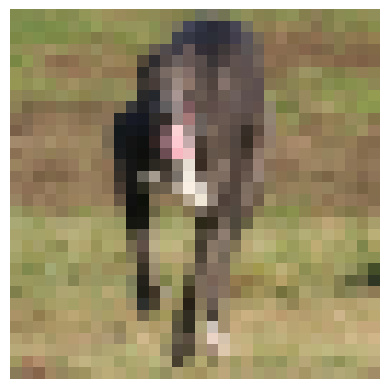

In [2]:
# input_array = np.load('data/cifar10/train.npz')
input_array = np.load('data/stl10/train_unlabeled.npz')

data = input_array['x']
img=data[1]

plt.imshow(img)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


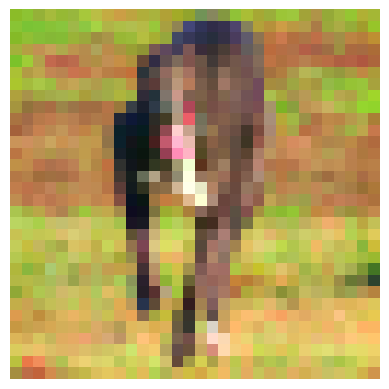

In [3]:
filter_size = 7

# filter=torch.load('trigger/filter_2023-08-17-21-27-15.pt', map_location=torch.device('cpu'))
# filter=torch.load('trigger/filter_2023-08-17-22-06-01.pt', map_location=torch.device('cpu'))
# filter=torch.load('trigger/filter.pt', map_location=torch.device('cpu'))
filter=torch.load('trigger/stl10/filter_2023-08-30-13-03-06.pt', map_location=torch.device('cpu'))

img_=torch.tensor(img).float().permute(2,0,1)
perturbed_image = F.conv2d(img_, filter, padding=filter_size//2)

# ssim = SSIM()
# loss_ssim2 = ssim(img_, perturbed_image)

perturbed_image_np = perturbed_image.cpu().detach().numpy()

plt.imshow(np.transpose(perturbed_image_np.astype(int), (1, 2, 0)))
plt.axis('off')
plt.show()

In [6]:
filter=torch.load('trigger/filter.pt', map_location=torch.device('cpu'))
filter_size = 7
first_input_image= next(iter(memory_loader))[0][1]  # 获取第一个批量的图像数据
first_input_image = first_input_image

perturbed_image = F.conv2d(first_input_image, filter, padding=filter_size//2)

# perturbed_image = F.conv2d(img.to(torch.float32).permute(2,0,1), filter, padding=filter_size//2)

perturbed_image_np = perturbed_image.cpu().detach().numpy()

# filter=torch.load('trigger/filter.pt', map_location=torch.device('cpu'))
# img=torch.from_numpy(img)
# perturbed_image = F.conv2d(img.permute(2,0,1).float(), filter, padding=3//2)


# perturbed_image_np = perturbed_image.permute(1, 2, 0).cpu().detach().numpy()#

mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]

perturbed_image_np = perturbed_image_np * std + mean

# Clip the pixel values to [0, 255] in case they go out of range due to the transformation
perturbed_image_np = (perturbed_image_np * 255).clip(0, 255).astype('uint8')

# Convert the NumPy array to a PIL image
perturbed_image_pil = Image.fromarray(perturbed_image_np)


plt.imshow(perturbed_image_np)
plt.axis('off')
plt.show()


NameError: name 'memory_loader' is not defined

# imagenet 可视化

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import StepLR

from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from pytorch_ssim import SSIM
from datetime import datetime
# from piq import ssim, SSIMLoss
from tqdm import tqdm

from torchvision import transforms
from bd_dataset_imagenet_filter import BadEncoderDataset
import numpy as np
from network import U_Net


timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

bd_transform = transforms.Compose([
    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=1.0),
    transforms.RandomGrayscale(p=1.0),
    transforms.ToTensor(),
])

transform1 = transforms.Compose([
    transforms.ToTensor(),
])

classes = [str(i) for i in range(5)]


training_data_num = 100
# np.random.seed(100)
training_data_sampling_indices = np.random.choice(training_data_num, int(training_data_num*0.1), replace=False)

shadow_dataset = BadEncoderDataset(
    root = "data/imagenet/train",
    class_type=classes,indices = training_data_sampling_indices,
    transform=transform1,
    bd_transform=bd_transform,
)
train_loader = DataLoader(shadow_dataset, batch_size=16, shuffle=True, pin_memory=True, drop_last=True)

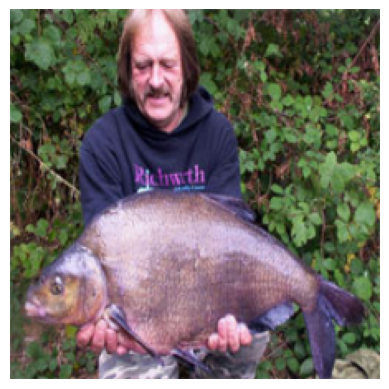

In [50]:
img=shadow_dataset[2][1]
scaled_image = (img.cpu().detach().numpy() * 255).astype(np.uint8)
img_backdoor = Image.fromarray(np.transpose(scaled_image,(1,2,0)))
plt.imshow(img_backdoor)
plt.axis('off')
plt.show()

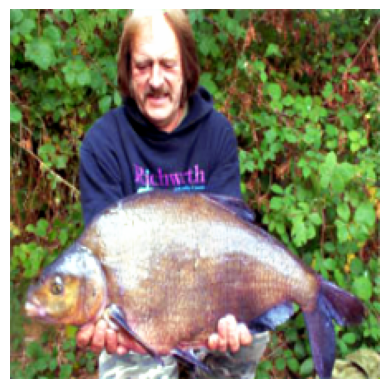

In [51]:
unet = torch.load('/home/hrzhang/projects/BadEncoder-main/trigger/imagenet/filter_2023-09-26-22-35-59.pt', map_location=torch.device('cpu'))
backdoored_image=unet(img.unsqueeze(0))
img_backdoor = backdoored_image.squeeze()
scaled_image = (img_backdoor.cpu().detach().numpy() * 255).astype(np.uint8)
img_backdoor = Image.fromarray(np.transpose(scaled_image,(1,2,0)))
plt.imshow(img_backdoor)
plt.axis('off')
plt.show()

# CIFAR10可视化

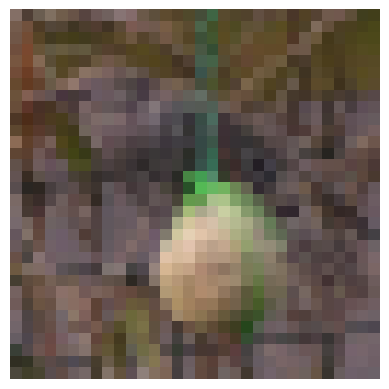

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from optimize_filter.network import AttU_Net

input_array = np.load('data/cifar10/train.npz')
# input_array = np.load('data/stl10/train.npz')

img_ = input_array['x']
img = Image.fromarray(img_[20])

# img
plt.imshow(img)
plt.axis('off')
plt.show()

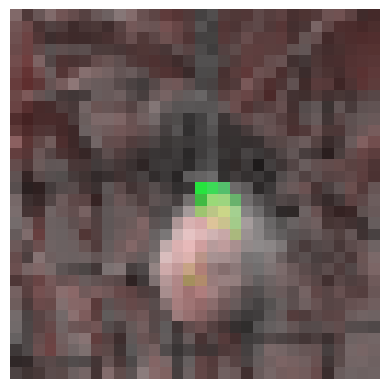

In [38]:
transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

tensor_image = transform1(img)
path='optimize_filter/trigger/2023-11-15-20-10-56/ssim0.9632_psnr25.09_lp0.0093_wd0.548_color7.001.pt'
# path='/home/hrzhang/projects/badencoder_filter/optimize_filter/trigger/2023-11-14-23-18-06/ssim0.9721_psnr29.62_lp0.0021_wd2.738.pt'
state_dict = torch.load(path, map_location=torch.device('cpu'))
# state_dict = torch.load('output/cifar10/stl10_backdoored_encoder/unet_filter_trained.pt', map_location=torch.device('cpu'))
# state_dict = torch.load('optimize_filter/trigger/2023-11-14-22-49-49/ssim0.9621_psnr27.45_lp0.0040_wd2.993.pt', map_location=torch.device('cpu'))

net = AttU_Net(img_ch=3,output_ch=3)
net.load_state_dict(state_dict['model_state_dict'])
net=net.eval()
img_backdoor=net(tensor_image.unsqueeze(0))

mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(1, 3, 1, 1)
std = torch.tensor([0.2023, 0.1994, 0.2010]).view(1, 3, 1, 1)

img_backdoor = img_backdoor * std + mean # denormalize

# img_backdoor = torch.clamp(img_backdoor, min=0, max=1)

sig=torch.nn.Sigmoid()
img_backdoor = sig(img_backdoor)

scaled_image = (img_backdoor.squeeze().detach().numpy() * 255).astype(np.uint8)
img_backdoor = Image.fromarray(np.transpose(scaled_image,(1,2,0)))

img_backdoor = img_backdoor.convert('RGB')
plt.imshow(img_backdoor)
plt.axis('off')  # Hide axis
plt.show()

# CIFAR10 224可视化

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from optimize_filter.network import AttU_Net

input_array = np.load('data/gtsrb/test_224.npz', mmap_mode='r')
# input_array = np.load('data/stl10/train.npz')



In [15]:
input_array.__dict__

{'_files': ['x.npy', 'y.npy'],
 'files': ['x', 'y'],
 'allow_pickle': False,
 'max_header_size': 10000,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='data/gtsrb/test_224.npz'> mode='r'>,
 'f': <numpy.lib.npyio.BagObj at 0x7f3e885c6d90>,
 'fid': <_io.BufferedReader name='data/gtsrb/test_224.npz'>}

In [16]:
img_ = input_array['x']


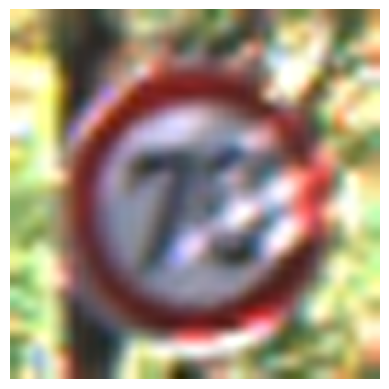

In [25]:
img = Image.fromarray(img_[14])

# img
plt.imshow(img)
plt.axis('off')
plt.show()

In [31]:
targets = input_array['y']
targets.squeeze().max()

42

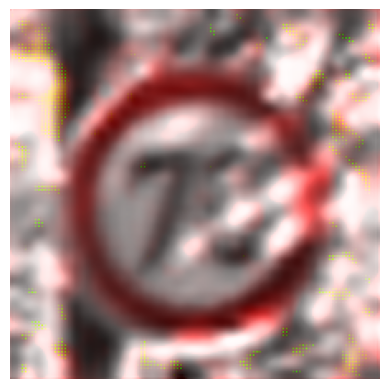

In [26]:
transform1 = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

tensor_image = transform1(img)
path='optimize_filter/trigger/imagenet/2023-11-18-16-53-52/ssim0.8527_psnr22.26_lp0.0492_wd0.205_color6.242.pt'
state_dict = torch.load(path, map_location=torch.device('cpu'))
# state_dict = torch.load('output/cifar10/stl10_backdoored_encoder/unet_filter_trained.pt', map_location=torch.device('cpu'))
# state_dict = torch.load('optimize_filter/trigger/2023-11-14-22-49-49/ssim0.9621_psnr27.45_lp0.0040_wd2.993.pt', map_location=torch.device('cpu'))

net = AttU_Net(img_ch=3,output_ch=3)
net.load_state_dict(state_dict['model_state_dict'])
net=net.eval()
img_backdoor=net(tensor_image.unsqueeze(0))

# mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(1, 3, 1, 1)
# std = torch.tensor([0.2023, 0.1994, 0.2010]).view(1, 3, 1, 1)

# img_backdoor = img_backdoor * std + mean # denormalize

# img_backdoor = torch.clamp(img_backdoor, min=0, max=1)

sig=torch.nn.Sigmoid()
img_backdoor = sig(img_backdoor)

scaled_image = (img_backdoor.squeeze().detach().numpy() * 255).astype(np.uint8)
img_backdoor = Image.fromarray(np.transpose(scaled_image,(1,2,0)))

img_backdoor = img_backdoor.convert('RGB')
plt.imshow(img_backdoor)
plt.axis('off')  # Hide axis
plt.show()

# STL10可视化

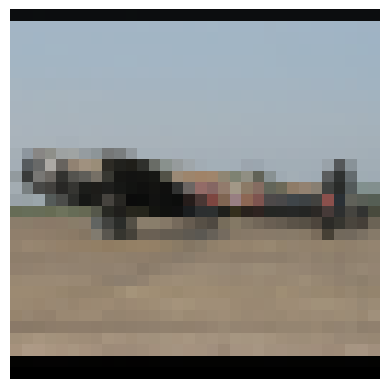

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from optimize_filter.network import AttU_Net

input_array = np.load('data/stl10/train.npz')

img_ = input_array['x']
img = Image.fromarray(img_[10])

# img
plt.imshow(img)
plt.axis('off')
plt.show()

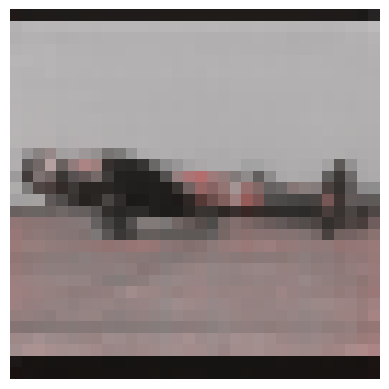

In [46]:
transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.44087798, 0.42790666, 0.38678814], [0.25507198, 0.24801506, 0.25641308])])

tensor_image = transform1(img)
path='optimize_filter/trigger/2023-11-15-20-10-56/ssim0.9632_psnr25.09_lp0.0093_wd0.548_color7.001.pt'
# path='/home/hrzhang/projects/badencoder_filter/optimize_filter/trigger/2023-11-14-23-18-06/ssim0.9721_psnr29.62_lp0.0021_wd2.738.pt'
state_dict = torch.load(path, map_location=torch.device('cpu'))
# state_dict = torch.load('output/cifar10/stl10_backdoored_encoder/unet_filter_trained.pt', map_location=torch.device('cpu'))
# state_dict = torch.load('optimize_filter/trigger/2023-11-14-22-49-49/ssim0.9621_psnr27.45_lp0.0040_wd2.993.pt', map_location=torch.device('cpu'))

net = AttU_Net(img_ch=3,output_ch=3)
net.load_state_dict(state_dict['model_state_dict'])
net=net.eval()
img_backdoor=net(tensor_image.unsqueeze(0))

mean = torch.tensor([0.44087798, 0.42790666, 0.38678814]).view(1, 3, 1, 1)
std = torch.tensor([0.25507198, 0.24801506, 0.25641308]).view(1, 3, 1, 1)

img_backdoor = img_backdoor * std + mean # denormalize

# img_backdoor = torch.clamp(img_backdoor, min=0, max=1)

sig=torch.nn.Sigmoid()
img_backdoor = sig(img_backdoor)

scaled_image = (img_backdoor.squeeze().detach().numpy() * 255).astype(np.uint8)
img_backdoor = Image.fromarray(np.transpose(scaled_image,(1,2,0)))

img_backdoor = img_backdoor.convert('RGB')
plt.imshow(img_backdoor)
plt.axis('off')  # Hide axis
plt.show()

# IMAGENET可视化

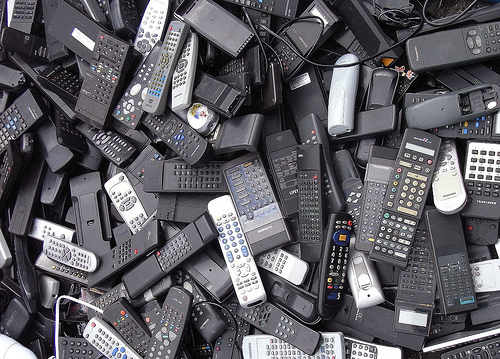

In [25]:
from PIL import Image
# img=Image.open('data/imagenet/train/n01440764/n01440764_18.JPEG')
# img=Image.open('data/imagenet/train/n01484850/n01484850_86.JPEG')
img=Image.open('data/imagenet/test/ILSVRC2012_test_00097015.JPEG')
# img=Image.open('data/imagenet/test/ILSVRC2012_test_00097017.JPEG')
# img=Image.open('data/imagenet/test/ILSVRC2012_test_00097012.JPEG')

# img=Image.open('data/gtsrb/selected_train_224/image_5_label_[41].jpeg')
# img=Image.open('data/gtsrb/selected_train_224/image_817_label_[31].jpeg')
# img=Image.open('data/gtsrb/selected_train_224/image_1211_label_[36].jpeg')
# img=Image.open('data/gtsrb/selected_train_224/image_1784_label_[23].jpeg')

img

In [24]:
import os
import glob
import shutil

# 获取data/imagenet/train目录下的所有子目录
subdirs = [d for d in os.listdir('data/imagenet/train') if os.path.isdir(os.path.join('data/imagenet/train', d))]

# 创建输出目录
os.makedirs('data/imagenet/train_sub', exist_ok=True)

for subdir in subdirs:
    # 获取子目录下的所有图像文件
    image_files = glob.glob(os.path.join('data/imagenet/train', subdir, '*.JPEG'))

    # 从每个子目录中复制前3张图像
    for image_file in image_files[:3]:
        # 获取图像的文件名
        filename = os.path.basename(image_file)

        # 复制图像到data/imagenet/train_sub目录
        shutil.copy(image_file, os.path.join('data/imagenet/train_sub', filename))

In [15]:

import torch,glob,os
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

from PIL import Image
import numpy as np
import shutil
import matplotlib.pyplot as plt
from optimize_filter.network import AttU_Net
from optimize_filter.tiny_network import U_Net_tiny

image_files = glob.glob('data/imagenet/train_sub/*.JPEG')
out_file='data/imagenet/ssim0.9544_psnr25.34_lp0.0311_wd0.188_color32.146-hue5'
trigger='optimize_filter/trigger/imagenet/2023-12-01-19-04-07/ssim0.9544_psnr25.34_lp0.0311_wd0.188_color32.146.pt'
# shutil.rmtree('data/imagenet/bd_train')
# 创建输出目录
os.makedirs(out_file, exist_ok=True)

class ConvertToRGB:
    def __call__(self, image):
        if image.mode != 'RGB':
            return image.convert('RGB')
        return image

transform1 = transforms.Compose([
    transforms.Resize((224, 224)),
    ConvertToRGB(),
    transforms.ToTensor(),
    # transforms.Normalize([0.4850, 0.4560, 0.4060], [0.2290, 0.2240, 0.2250])
])

# state_dict = torch.load('optimize_filter/trigger/imagenet/2023-11-16-10-52-28/ssim0.9977_psnr34.93_lp0.0098_wd0.001_color1.742.pt', map_location=torch.device('cpu'))
state_dict = torch.load(trigger, map_location=torch.device('cpu'))

net = U_Net_tiny(img_ch=3,output_ch=3)
net.load_state_dict(state_dict['model_state_dict'])
net=net.eval()

for i,image_file in enumerate(image_files):
    if i > 50:
        break
    img = Image.open(image_file)
    tensor_image = transform1(img)
    # print(tensor_image.shape)
    # assert tensor_image.shape == (3,224,224)

    img_backdoor=net(tensor_image.unsqueeze(0))


    # mean = torch.tensor([0.4850, 0.4560, 0.4060]).view(1, 3, 1, 1)
    # std = torch.tensor([0.2290, 0.2240, 0.2250]).view(1, 3, 1, 1)

    # img_backdoor = img_backdoor * std + mean # denormalize

    sig=torch.nn.Sigmoid()
    img_backdoor = sig(img_backdoor)

    scaled_image = (img_backdoor.squeeze().detach().numpy() * 255).astype(np.uint8)
    img_backdoor = Image.fromarray(np.transpose(scaled_image,(1,2,0)))


    img_backdoor = img_backdoor.convert('RGB')
    # 获取图像的文件名
    filename = os.path.basename(image_file)

    # 保存图像到data/gtsrb/bd_test目录
    img_backdoor.save(os.path.join(out_file, filename))

# gtsrb可视化

In [2]:
import os
import glob
import shutil

os.makedirs('data/gtsrb/bd_test', exist_ok=True)

transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.4850, 0.4560, 0.4060], [0.2290, 0.2240, 0.2250])
])
state_dict = torch.load('optimize_filter/trigger/imagenet_gtsrb_stl10_svhn/2023-11-24-22-14-34/ssim0.9645_psnr23.31_lp0.0661_wd0.045_color7.489.pt', map_location=torch.device('cpu'))

net = AttU_Net(img_ch=3,output_ch=3)
net.load_state_dict(state_dict['model_state_dict'])
net=net.eval()

# 获取data/gtsrb/test_224目录下的所有图像文件
image_files = glob.glob('data/gtsrb/test_224/*.jpeg')

shutil.rmtree('data/gtsrb/bd_test')
# 创建输出目录
os.makedirs('data/gtsrb/bd_test', exist_ok=True)

for i,image_file in enumerate(image_files):
    if i > 50:
        break
    # 读取图像
    img = Image.open(image_file)

    # 将图像转换为Tensor并进行标准化
    tensor_image = transform1(img)

    # 使用模型生成后门图像
    img_backdoor = net(tensor_image.unsqueeze(0))


    mean = torch.tensor([0.4850, 0.4560, 0.4060]).view(1, 3, 1, 1)
    std = torch.tensor([0.2290, 0.2240, 0.2250]).view(1, 3, 1, 1)

    # 反标准化
    img_backdoor = img_backdoor * std + mean

    # 应用Sigmoid函数
    img_backdoor = sig(img_backdoor)

    # 将Tensor转换为numpy数组，并将值的范围从[0, 1]转换为[0, 255]
    scaled_image = (img_backdoor.squeeze().detach().numpy() * 255).astype(np.uint8)

    # 将numpy数组的形状从(C, H, W)转换为(H, W, C)
    img_backdoor = Image.fromarray(np.transpose(scaled_image, (1, 2, 0)))

    # 将图像转换为RGB格式
    img_backdoor = img_backdoor.convert('RGB')

    # 获取图像的文件名
    filename = os.path.basename(image_file)

    # 保存图像到data/gtsrb/bd_test目录
    img_backdoor.save(os.path.join('data/gtsrb/bd_test', filename))

# STL10 backdoor可视化

In [3]:
import os
import glob

os.makedirs('data/stl10/bd_test', exist_ok=True)


mean = torch.tensor([0.4850, 0.4560, 0.4060]).view(3, 1, 1)
std = torch.tensor([0.2290, 0.2240, 0.2250]).view(3, 1, 1)

transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
state_dict = torch.load('optimize_filter/trigger/imagenet_gtsrb_stl10_svhn/2023-11-24-22-12-29/ssim0.8641_psnr20.56_lp0.0788_wd0.055_color7.682.pt', map_location=torch.device('cpu'))

net = AttU_Net(img_ch=3,output_ch=3)
net.load_state_dict(state_dict['model_state_dict'])
net=net.eval()

shutil.rmtree('data/stl10/bd_test')

# 获取data/gtsrb/test_224目录下的所有图像文件
image_files = glob.glob('data/stl10/test_224/*.jpeg')

# 创建输出目录
os.makedirs('data/stl10/bd_test', exist_ok=True)

for i,image_file in enumerate(image_files):
    if i > 50:
        break
    # 读取图像
    img = Image.open(image_file)

    # 将图像转换为Tensor并进行标准化
    tensor_image = transform1(img)

    # 使用模型生成后门图像
    img_backdoor = net(tensor_image.unsqueeze(0))

    # 反标准化
    img_backdoor = img_backdoor * std + mean

    # 应用Sigmoid函数
    img_backdoor = sig(img_backdoor)

    # 将Tensor转换为numpy数组，并将值的范围从[0, 1]转换为[0, 255]
    scaled_image = (img_backdoor.squeeze().detach().numpy() * 255).astype(np.uint8)

    # 将numpy数组的形状从(C, H, W)转换为(H, W, C)
    img_backdoor = Image.fromarray(np.transpose(scaled_image, (1, 2, 0)))

    # 将图像转换为RGB格式
    img_backdoor = img_backdoor.convert('RGB')

    # 获取图像的文件名
    filename = os.path.basename(image_file)

    # 保存图像到data/gtsrb/bd_test目录
    img_backdoor.save(os.path.join('data/stl10/bd_test', filename))

# svhn backdoor可视化

In [6]:
import os
import glob


mean = torch.tensor([0.4850, 0.4560, 0.4060]).view(3, 1, 1)
std = torch.tensor([0.2290, 0.2240, 0.2250]).view(3, 1, 1)

transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
state_dict = torch.load('optimize_filter/trigger/imagenet_gtsrb_stl10_svhn/2023-11-24-22-12-29/ssim0.8641_psnr20.56_lp0.0788_wd0.055_color7.682.pt', map_location=torch.device('cpu'))

net = AttU_Net(img_ch=3,output_ch=3)
net.load_state_dict(state_dict['model_state_dict'])
net=net.eval()

shutil.rmtree('data/svhn/bd_test')

# 获取data/gtsrb/test_224目录下的所有图像文件
image_files = glob.glob('data/svhn/test_224/*.jpeg')

# 创建输出目录
os.makedirs('data/svhn/bd_test', exist_ok=True)

for i,image_file in enumerate(image_files):
    if i > 50:
        break
    # 读取图像
    img = Image.open(image_file)

    # 将图像转换为Tensor并进行标准化
    tensor_image = transform1(img)

    # 使用模型生成后门图像
    img_backdoor = net(tensor_image.unsqueeze(0))

    # 反标准化
    img_backdoor = img_backdoor * std + mean

    # 应用Sigmoid函数
    img_backdoor = sig(img_backdoor)

    # 将Tensor转换为numpy数组，并将值的范围从[0, 1]转换为[0, 255]
    scaled_image = (img_backdoor.squeeze().detach().numpy() * 255).astype(np.uint8)

    # 将numpy数组的形状从(C, H, W)转换为(H, W, C)
    img_backdoor = Image.fromarray(np.transpose(scaled_image, (1, 2, 0)))

    # 将图像转换为RGB格式
    img_backdoor = img_backdoor.convert('RGB')

    # 获取图像的文件名
    filename = os.path.basename(image_file)

    # 保存图像到data/gtsrb/bd_test目录
    img_backdoor.save(os.path.join('data/svhn/bd_test', filename))

In [11]:
import torch
import glob
import os
from PIL import Image
import numpy as np
from optimize_filter.network import AttU_Net
from torchvision import transforms
from optimize_filter.tiny_network import U_Net_tiny

def backdoor_img(input_dir, state_dict_path, output_dir, mean=None, std=None):

    # 获取输入目录下的所有图像文件
    image_files = glob.glob(os.path.join(input_dir, '*.[jJ][pP][eE][gG]'))

    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)

    # 加载模型
    state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))
    net = U_Net_tiny(img_ch=3,output_ch=3)
    net.load_state_dict(state_dict['model_state_dict'])
    net = net.eval()

    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
    for i, image_file in enumerate(image_files):
        if i > 50:
            break
        img = Image.open(image_file)

        tensor_image = transform(img)

        img_backdoor = net(tensor_image.unsqueeze(0))

        img_backdoor = img_backdoor * std + mean  # denormalize

        # sig = torch.nn.Sigmoid()
        # img_backdoor = sig(img_backdoor)
        img_backdoor = torch.clamp(img_backdoor, min=0, max=1)

        scaled_image = (img_backdoor.squeeze().detach().numpy() * 255).astype(np.uint8)
        img_backdoor = Image.fromarray(np.transpose(scaled_image, (1, 2, 0)))

        img_backdoor = img_backdoor.convert('RGB')

        # 获取图像的文件名
        filename = os.path.basename(image_file)

        # 保存图像到输出目录
        img_backdoor.save(os.path.join(output_dir, filename))

In [17]:
mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(1, 3, 1, 1)
std = torch.tensor([0.2023, 0.1994, 0.2010]).view(1, 3, 1, 1)
state_dict_path = 'optimize_filter/trigger/cifar10/2023-11-15-15-39-13/ssim0.9520_psnr23.58_lp0.0161_wd0.548_color6.948.pt'
input_dir = 'data/cifar10/train'
output_dir = 'data/cifar10/cifar10_bd'

backdoor_img(input_dir, state_dict_path, output_dir, mean, std)

/tmp/ipykernel_31660/632717859.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean = torch.tensor(mean).view(3, 1, 1)
/tmp/ipykernel_31660/632717859.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std = torch.tensor(std).view(3, 1, 1)


In [12]:
mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(1, 3, 1, 1)
std = torch.tensor([0.2023, 0.1994, 0.2010]).view(1, 3, 1, 1)
state_dict_path = 'output/cifar10/stl10_backdoored_encoder/2023-12-11-00:56:40/unet_filter_200_trained.pt'
input_dir = 'data/stl10/train'
output_dir = 'data/stl10/2023-12-11-00:56:40'

backdoor_img(input_dir, state_dict_path, output_dir, mean, std)

/tmp/ipykernel_2086022/1891363038.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean = torch.tensor(mean).view(3, 1, 1)
/tmp/ipykernel_2086022/1891363038.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std = torch.tensor(std).view(3, 1, 1)


In [9]:
state_dict_path = 'optimize_filter/trigger/imagenet/2023-12-01-17-38-18/ssim0.9681_psnr31.89_lp0.0124_wd0.203_color5.491.pt'
input_dir = 'data/imagenet/train_sub'
output_dir = 'data/imagenet/ssim0.9681_psnr31.89_lp0.0124_wd0.203_color5.491'

backdoor_img(input_dir, state_dict_path, output_dir)

RuntimeError: Error(s) in loading state_dict for U_Net_tiny:
	Missing key(s) in state_dict: "Conv1.conv.3.weight", "Conv1.conv.3.bias", "Conv1.conv.4.weight", "Conv1.conv.4.bias", "Conv1.conv.4.running_mean", "Conv1.conv.4.running_var", "Conv2.conv.3.weight", "Conv2.conv.3.bias", "Conv2.conv.4.weight", "Conv2.conv.4.bias", "Conv2.conv.4.running_mean", "Conv2.conv.4.running_var", "Conv3.conv.3.weight", "Conv3.conv.3.bias", "Conv3.conv.4.weight", "Conv3.conv.4.bias", "Conv3.conv.4.running_mean", "Conv3.conv.4.running_var", "Conv4.conv.3.weight", "Conv4.conv.3.bias", "Conv4.conv.4.weight", "Conv4.conv.4.bias", "Conv4.conv.4.running_mean", "Conv4.conv.4.running_var", "Conv5.conv.3.weight", "Conv5.conv.3.bias", "Conv5.conv.4.weight", "Conv5.conv.4.bias", "Conv5.conv.4.running_mean", "Conv5.conv.4.running_var", "Up_conv5.conv.3.weight", "Up_conv5.conv.3.bias", "Up_conv5.conv.4.weight", "Up_conv5.conv.4.bias", "Up_conv5.conv.4.running_mean", "Up_conv5.conv.4.running_var", "Up_conv4.conv.3.weight", "Up_conv4.conv.3.bias", "Up_conv4.conv.4.weight", "Up_conv4.conv.4.bias", "Up_conv4.conv.4.running_mean", "Up_conv4.conv.4.running_var", "Up_conv3.conv.3.weight", "Up_conv3.conv.3.bias", "Up_conv3.conv.4.weight", "Up_conv3.conv.4.bias", "Up_conv3.conv.4.running_mean", "Up_conv3.conv.4.running_var", "Up_conv2.conv.3.weight", "Up_conv2.conv.3.bias", "Up_conv2.conv.4.weight", "Up_conv2.conv.4.bias", "Up_conv2.conv.4.running_mean", "Up_conv2.conv.4.running_var". 

# 将npz转换成图片

In [32]:
import os
from PIL import Image
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset

from torchvision.transforms import Compose, Resize, ToTensor

transform = Compose([
    Resize((224, 224)),  # Resize the image to 224x224 pixels
    ToTensor(),  # Convert the image to PyTorch Tensor data type
])

class GTSRB(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.images = []
        self.labels = []
        for label in os.listdir(directory):
            for image_file in os.listdir(os.path.join(directory, label)):
                self.images.append(os.path.join(directory, label, image_file))
                self.labels.append(int(label))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx])
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label

# Use the transform while creating the dataset
dataset = GTSRB('data/gtsrb/data/Train', transform=transform)

In [44]:
for i in range(10000):
    image, label = dataset[i]
    if image.shape[0] >=224 or image.shape[1] >=224:
        print(image.shape, label)

In [5]:
import numpy as np
from PIL import Image
import os
# Load the npz file

# Function to save images
def save_images(data, folder):
    os.makedirs(folder, exist_ok=True)
    images = data['x']
    labels = data['y']
    for i in range(len(images)):
        img = Image.fromarray(images[i].astype('uint8'))  # Convert numpy array to PIL Image
        img.save(os.path.join(folder, f'image_{i}_label_{labels[i]}.jpeg'))

# Save the images

In [6]:
train_data = np.load('data/cifar10/train.npz')
test_data = np.load('data/cifar10/test.npz')
save_images(test_data, 'data/cifar10/test')
save_images(train_data, 'data/cifar10/train')

In [7]:
train_data = np.load('data/stl10/train.npz')
test_data = np.load('data/stl10/test.npz')
save_images(test_data, 'data/stl10/test')
save_images(train_data, 'data/stl10/train')

In [8]:
train_data = np.load('data/gtsrb/train.npz')
test_data = np.load('data/gtsrb/test.npz')
save_images(test_data, 'data/gtsrb/test')
save_images(train_data, 'data/gtsrb/train')

In [9]:
train_data = np.load('data/svhn/train.npz')
test_data = np.load('data/svhn/test.npz')
save_images(test_data, 'data/svhn/test')
save_images(train_data, 'data/svhn/train')

In [ ]:
train_data = np.load('data/gtsrb/train_224.npz')
test_data = np.load('data/gtsrb/test_224.npz')
save_images(test_data, 'data/gtsrb/test_224')
save_images(train_data, 'data/gtsrb/train_224')

In [3]:
train_data = np.load('data/svhn/train_224.npz')
test_data = np.load('data/svhn/test_224.npz')
save_images(train_data, 'data/svhn/train_224')
save_images(test_data, 'data/svhn/test_224')

In [5]:
train_data = np.load('data/stl10/train_224.npz')
test_data = np.load('data/stl10/test_224.npz')
save_images(train_data, 'data/stl10/train_224')
save_images(test_data, 'data/stl10/test_224')

In [13]:
import numpy as np
target_input_array = np.load('reference/cifar10/one.npz')

In [11]:
target_input_array.__dict__

{'_files': ['x.npy', 'y.npy', 'info.npy'],
 'files': ['x', 'y', 'info'],
 'allow_pickle': False,
 'max_header_size': 10000,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='reference/imagenet/one.npz'> mode='r'>,
 'f': <numpy.lib.npyio.BagObj at 0x7f784c07dc40>,
 'fid': <_io.BufferedReader name='reference/imagenet/one.npz'>}

In [15]:
target_input_array['x'].shape

(1, 32, 32, 3)